In [1]:
import os
import zipfile
import random
import shutil
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
from os import getcwd
print(tf.version.VERSION)

2.3.0


In [ ]:
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
# YOUR CODE STARTS HERE
    files = []
    for filename in os.listdir(SOURCE):
            file = SOURCE + filename
            if os.path.getsize(file) > 0:
                files.append(filename)
            else:
                print(filename + " is zero length, so ignoring.")

    training_length = int(len(files) * SPLIT_SIZE)
    testing_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    testing_set = shuffled_set[-testing_length:]

    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        copyfile(this_file, destination)

    for filename in testing_set:
        this_file = SOURCE + filename
        destination = TESTING + filename
        copyfile(this_file, destination)
# YOUR CODE ENDS HERE


LEFT_SOURCE_DIR = "D:/project/autocar/Self-driving-car-master/images2/a/"
TRAINING_LEFT_DIR = "D:/project/autocar/Self-driving-car-master/images2/train/a/"
TESTING_LEFT_DIR = "D:/project/autocar/Self-driving-car-master/images2/test/a/"
RIGHT_SOURCE_DIR ="D:/project/autocar/Self-driving-car-master/images2/d/"
TRAINING_RIGHT_DIR = "D:/project/autocar/Self-driving-car-master/images2/train/d/"
TESTING_RIGHT_DIR = "D:/project/autocar/Self-driving-car-master/images2/test/d/"
STRAIGHT_SOURCE_DIR ="D:/project/autocar/Self-driving-car-master/images2/w/"
TRAINING_STRAIGHT_DIR = "D:/project/autocar/Self-driving-car-master/images2/train/w/"
TESTING_STRAIGHT_DIR = "D:/project/autocar/Self-driving-car-master/images2/test/w/"

split_size = .9
split_data(LEFT_SOURCE_DIR, TRAINING_LEFT_DIR, TESTING_LEFT_DIR, split_size)
split_data(RIGHT_SOURCE_DIR, TRAINING_RIGHT_DIR, TESTING_RIGHT_DIR, split_size)
split_data(STRAIGHT_SOURCE_DIR, TRAINING_STRAIGHT_DIR, TESTING_STRAIGHT_DIR, split_size)



In [2]:
print(len(os.listdir("D:/project/autocar/Self-driving-car-master/images2/train/a/")))
print(len(os.listdir("D:/project/autocar/Self-driving-car-master/images2/test/a/")))
print(len(os.listdir("D:/project/autocar/Self-driving-car-master/images2/train/d/")))
print(len(os.listdir("D:/project/autocar/Self-driving-car-master/images2/test/d/")))
print(len(os.listdir("D:/project/autocar/Self-driving-car-master/images2/train/w/")))
print(len(os.listdir("D:/project/autocar/Self-driving-car-master/images2/test/w/")))

3896
750
3769
722
13465
2590


In [3]:
"""import numpy as np
training_images, training_labels = get_data("D:/project/autocar/Self-driving-car-master/images2/train/")
testing_images, testing_labels = get_data("D:/project/autocar/Self-driving-car-master/images2/test/")

training_images, training_labels = get_data(path_sign_mnist_train)
testing_images, testing_labels = get_data(path_sign_mnist_test)"""

'import numpy as np\ntraining_images, training_labels = get_data("D:/project/autocar/Self-driving-car-master/images2/train/")\ntesting_images, testing_labels = get_data("D:/project/autocar/Self-driving-car-master/images2/test/")\n\ntraining_images, training_labels = get_data(path_sign_mnist_train)\ntesting_images, testing_labels = get_data(path_sign_mnist_test)'

In [4]:

TRAINING_DIR =  "D:/project/autocar/Self-driving-car-master/images2/train/"
train_datagen = ImageDataGenerator(rescale=1.0/255,#rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                 # shear_range=0.2,
                                 # zoom_range=0.2,
                                 # horizontal_flip=True,
                                 # fill_mode='nearest'
                                  )
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=8,
                                                    class_mode='categorical',
                                                    target_size=(128,128)
                                                   )

VALIDATION_DIR = "D:/project/autocar/Self-driving-car-master/images2/test/"
validation_datagen = ImageDataGenerator(rescale=1.0/255.)
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=8,
                                                              class_mode='categorical',
                                                              target_size=(128,128)
                                                             )

Found 21130 images belonging to 3 classes.
Found 4062 images belonging to 3 classes.


In [3]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(128,128 ,3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer=RMSprop(lr=0.001), loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 126, 126, 64)      1792      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 63, 63, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 61, 61, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 12, 12, 128)      

In [ ]:
history = model.fit_generator(train_generator,
                              epochs=3,
                              verbose=1,
                              validation_data=validation_generator)


W0827 00:21:28.441515 10564 deprecation.py:323] From <ipython-input-6-e96c8ad2c0df>:4: Model.fit_generator (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
Please use Model.fit, which supports generators.


Epoch 1/3
 823/2642 [========>.....................] - ETA: 3:54 - loss: 0.3519 - acc: 0.8793

In [7]:
model.save('mymodelcartf2.h5',overwrite=True)

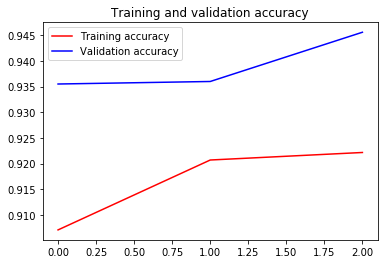

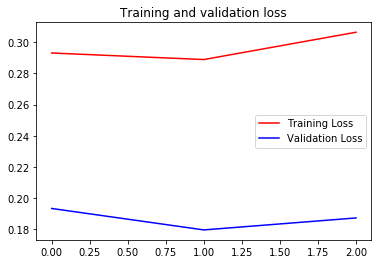

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [1]:
import sys
import numpy as np
import tensorflow as tf
from datetime import datetime

device_name="/gpu:0"

shape=(int(10000),int(10000))

with tf.device(device_name):
    random_matrix = tf.random_uniform(shape=shape, minval=0, maxval=1)
    dot_operation = tf.matmul(random_matrix, tf.transpose(random_matrix))
    sum_operation = tf.reduce_sum(dot_operation)

startTime = datetime.now()
with tf.Session(config=tf.ConfigProto(log_device_placement=True)) as session:
        result = session.run(sum_operation)
        print(result)

print("\n" * 2)
print("Shape:", shape, "Device:", device_name)
print("Time taken:", datetime.now() - startTime)

print("\n" * 2)

AttributeError: module 'tensorflow' has no attribute 'random_uniform'